In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## making a dummy dataset for demonstration
## First creating a dictionary
data = {'Marketing Spend(Million $)':[23 , 26, 30 , 34 , 43 , 48],'Sales(Million $)':[651 , 762 , 856 ,1063 , 1190 , 1298]}

In [3]:
## Now making the dataset from the dictionary
data = pd.DataFrame(data)
data

,Marketing Spend(Million $),Sales(Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


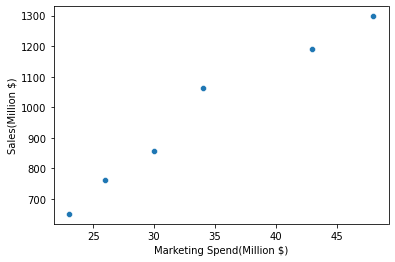

In [4]:
## Visualising the data through scatter plot
import seaborn as sns
sns.scatterplot(x=data['Marketing Spend(Million $)'],y=data['Sales(Million $)'])
plt.show()

- Not a perfect linear relationship

####  Scaling data between 0 and 1 (remember we always scale data before regularization)
#### Here we are scaling to check for some higher range values

In [5]:
## importing libraries
from sklearn.preprocessing import MinMaxScaler

In [6]:
## instantiating object
scalar = MinMaxScaler()
## fitting
data[['Marketing Spend(Million $)','Sales(Million $)']] = scalar.fit_transform(data[['Marketing Spend(Million $)','Sales(Million $)']])
data

,Marketing Spend(Million $),Sales(Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


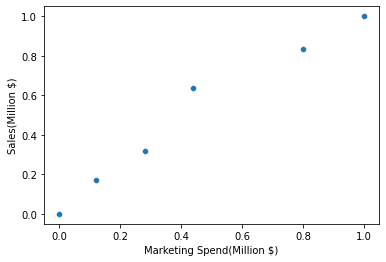

In [7]:
## again visualising the data
sns.scatterplot(x=data['Marketing Spend(Million $)'],y=data['Sales(Million $)'])
plt.show()

### Building the linear regression model

In [8]:
## splitting into X and y lables
X = data['Marketing Spend(Million $)']
y = data['Sales(Million $)']

In [9]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(6,)
<class 'pandas.core.series.Series'>
(6,)
<class 'pandas.core.series.Series'>


- Need to convert botth X and y into 2-D Numpy arrays

In [10]:
## converting both X and y into 2-D Numpy arrays
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(6, 1)
<class 'numpy.ndarray'>
(6, 1)
<class 'numpy.ndarray'>


- Now X and y are ready to be fed into the linear regression model

### Building Linear Regression Model

In [11]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [12]:
## instatiating object
lr = LinearRegression()
## fitting into model
lr.fit(X,y)
## making predictions
y_pred = lr.predict(X)

### Evaluating model metrics
- R-Squared
- Visualising Model Fit
- Checking Coefficients b0 and b1

In [13]:
## Calculating R-squared
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9652190930694494

In [14]:
## calculating b0 and b1
b0 = lr.intercept_
b1 = lr.coef_
print("The value of b0:",b0)
print('The value of b1:',b1)

The value of b0: [0.05907859]
The value of b1: [[0.98628689]]


#### Calculating other metrics

In [15]:
## RSS = 𝛴(y - y_pred)²
RSS = np.sum(np.square(y-y_pred))
print('RSS:',RSS)
## MSE = RSS/N
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
print('MSE:',MSE)
## RMSE = √MSE
RMSE = MSE**.5
print('RMSE:',RMSE)

RSS: 0.026808307381756883
MSE: 0.004468051230292814
RMSE: 0.06684348308019873


#### Visualising Model Fit

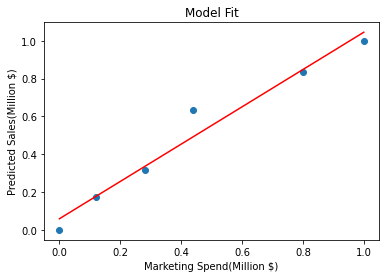

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.title('Model Fit')
plt.xlabel('Marketing Spend(Million $)')
plt.ylabel('Predicted Sales(Million $)')
plt.show()

## Checking for assumptions

### Residual Analysis
- Residuals v/s Predictions plot to detect:
   - Non-Linearity
   - Unequal Error Variances
   - Outliers
- Histogram of the error terms to detect:
   - Non-Normality of Error Terms

In [17]:
## creating res variable
res = y - y_pred

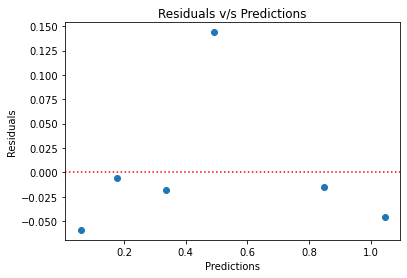

In [18]:
## Residuals v/s Predictions
plt.scatter(y_pred,res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

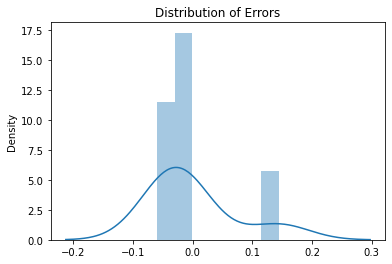

In [19]:
## Histogram of the error terms
sns.distplot(res)
plt.title('Distribution of Errors')
plt.show()

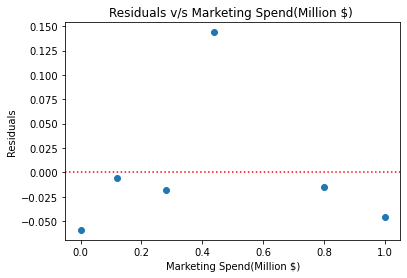

In [20]:
## to check non-linearity
plt.scatter(X,res)
plt.axhline(y=0,color='red',linestyle=':')
plt.title('Residuals v/s Marketing Spend(Million $) ')
plt.xlabel('Marketing Spend(Million $)')
plt.ylabel('Residuals')
plt.show()

- Violation of assumptions of linear regression
- Non-linearity

## Let us say that we want a better fit and hence we use higher degree polynomials as predictors. 

In [21]:
## importing libraries
from sklearn.preprocessing import PolynomialFeatures

#### help(PolynomialFeatures)
- Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [22]:
## Creating X label
X = data['Marketing Spend(Million $)']
## Reshaping X
X = np.array(X).reshape(-1,1)

- Alternate code
   - X.values( ).reshape(-1,1)

In [23]:
print(X.shape)
print(type(X))

(6, 1)
<class 'numpy.ndarray'>


In [24]:
print(X)

[[0.  ]
 [0.12]
 [0.28]
 [0.44]
 [0.8 ]
 [1.  ]]


- Let's say that we want to generate ploynomial features less than and equal to 3. 
- What would that look like? Let's see

In [25]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[1.      , 0.      , 0.      , 0.      ],
       [1.      , 0.12    , 0.0144  , 0.001728],
       [1.      , 0.28    , 0.0784  , 0.021952],
       [1.      , 0.44    , 0.1936  , 0.085184],
       [1.      , 0.8     , 0.64    , 0.512   ],
       [1.      , 1.      , 1.      , 1.      ]])

- Tranforms X to X⁰, X¹, X², X³ !!
- Hence, the shape has tarnformed from (6,1) to (6,4).

### Now let's create our model for upto degree 5

In [26]:
## instantiating object
polyreg5 = PolynomialFeatures(5)

In [27]:
## Transforming input features to polynomial features
## Fitting and transforming to create new X as X_poly5
X_poly5 = polyreg5.fit_transform(X)
X_poly5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.20000000e-01, 1.44000000e-02, 1.72800000e-03,
        2.07360000e-04, 2.48832000e-05],
       [1.00000000e+00, 2.80000000e-01, 7.84000000e-02, 2.19520000e-02,
        6.14656000e-03, 1.72103680e-03],
       [1.00000000e+00, 4.40000000e-01, 1.93600000e-01, 8.51840000e-02,
        3.74809600e-02, 1.64916224e-02],
       [1.00000000e+00, 8.00000000e-01, 6.40000000e-01, 5.12000000e-01,
        4.09600000e-01, 3.27680000e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])

In [28]:
X_poly5.shape

(6, 6)

- Created X⁰, X¹, X², X³, X⁴, X⁵!!
- shape changed from 6,1 to 6,6
- for every row, 5 additional columns have been added(X⁰, X², X³, X⁴, X⁵)

In [29]:
#Building model
## importing library
from sklearn.linear_model import LinearRegression
## instantiating object
linreg5 = LinearRegression()
## fitting into object
linreg5.fit(X_poly5,y)
## making predcitions
y_pred5 = linreg5.predict(X_poly5)

### Evaluating model metrics
- R-Squared
- Checking Coefficients b0 and b1
- Visualising Model Fit
- Other metrics: RSS,MSE,RMSE

In [30]:
## checking R-Squared
from sklearn.metrics import r2_score
r2_score(y,y_pred5)

1.0

- Clearly there s overfitting beacuse of:
  - 1. Transfromation
  - 2. Very few number of datapoints

In [31]:
## coefficients b0 and b1
b0 = linreg5.intercept_
b1 = linreg5.coef_
print('The Value of b0:',b0)
print('The Values of b1:',b1)

The Value of b0: [-4.49640325e-15]
The Values of b1: [[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]


In [32]:
(linreg5.coef_).reshape(6,)

array([  0.        ,   2.94295226, -19.85351777,  71.18543313,
       -95.27426562,  41.99939801])

In [33]:
type(linreg5.coef_)

numpy.ndarray

## Visaulising model fit
###  Plotting the polynomial regression(degree-5) and simple linear regression

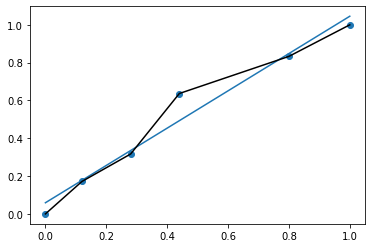

In [34]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.plot(X,y_pred5,color='black')
plt.show()

- This is a crude curve, lets say we want to make the curve smooth.
- We will create a new variable X_seq which will create say 300 points between X.min and X.max for the curve to be more smooth

### Steps
  - 1. create X_seq
  - 2. find new y_pred_seq for lr model for this new X_seq
  - 3. find new y_pred5_seq for linreg5 model for this new X_seq
  - 4. visualise

#### np.linspace( )
- Return evenly spaced numbers over a specified interval.
- Returns num evenly spaced samples, calculated over the interval [start, stop].
- The endpoint of the interval can optionally be excluded.


In [35]:
## creating X_seq
X_seq = np.linspace(X.min(),X.max(),300)

In [36]:
print(X_seq.shape)
print(type(X_seq))

(300,)
<class 'numpy.ndarray'>


- We have to convert it to a 2-D array

In [37]:
## reshaping
##since X_seq was already an array, we did not use np.array(X_seq) or X_seq.values.reshape
X_seq = X_seq.reshape(-1,1)
print(X_seq.shape)
print(type(X_seq))

(300, 1)
<class 'numpy.ndarray'>


### creating new y_preds for new Values of X_seq

In [38]:
## creating new y_pred for lr model
y_pred_seq = lr.predict(X_seq)

In [39]:
# Creating new y_pred5_seq for linreg model
##  First We have to transform X_seq to polynomial features of degrees upto 5
X_poly5_seq = polyreg5.fit_transform(X_seq)
## Then we create y_poly5_pred for this new X_poly5_seq
y_poly5_pred = linreg5.predict(X_poly5_seq)

### Now that we have new X and y_preds for both model after incorporating X_seq, we are ready to again visualise Model Fit

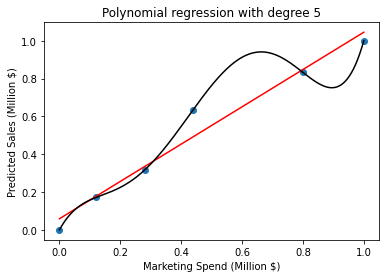

In [40]:
plt.scatter(X,y)
plt.plot(X_seq,y_pred_seq,color='red')
plt.plot(X_seq,y_poly5_pred,color='black')
plt.title('Polynomial regression with degree 5')
plt.xlabel('Marketing Spend (Million $)')
plt.ylabel('Predicted Sales (Million $)')
plt.show()

#### Other metrics

In [41]:
## RSS = 𝛴(y - y_pred)²
RSS = np.sum(np.square(y-y_pred5))
print('RSS:',RSS)
## MSE = RSS/N
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred5)
print('MSE:',MSE)
## RMSE = √MSE
RMSE = MSE**.5
print('RMSE:',RMSE)

RSS: 1.6288128800067282e-28
MSE: 2.714688133344547e-29
RMSE: 5.2102669157582964e-15


# Ridge Regression

- Applying Ridge Regression with varying the hyperparameter 'lambda'

### Steps:
 - 1. Use linspace to create a number of evenly spaced variables(300 in this case) between X.min and X.max. We are using this because we have very few number of datapoints. We call this X_seq. Reshape X_seq to 2-D array
  - 2. Create a list of values to be used for tuning the hyperparameter `'lambda'`.
  - 3. Create polynomial features of 'n' degree by transforming X
  - 4. Within a `for loop` for the values of i in the above list:
       - (A). Using these transformed X, create a ridge regression model
       - (B). Visualise for different lambdas using both linear reg and ridge reg
             - Redefine y_pred_poly_seq of ridge for X_seq
             - Redefine y_pred of lr, though this can be done outside the loop as well
       - (C). Get r2_score for different lambdas
       
- Q: We have to define y_pred_ridge_seq within the for loop->why?       
   - Because we are using ridge regression and it uses lambda, and sinse we are taking different values of lambda from the lambdas list we have to define y_pred_ridge_seq within the for loop

In [42]:
## creating X_seq
X_seq = np.linspace(X.min(),X.max(),300)
print(X_seq.shape)
print(type(X_seq))

(300,)
<class 'numpy.ndarray'>


- Need to reshape it to a 2-D array.

In [43]:
## reshaping X_seq
X_seq = X_seq.reshape(-1,1)
print(X_seq.shape)
print(type(X_seq))

(300, 1)
<class 'numpy.ndarray'>


- Now it is ready to be fed into the model.

In [44]:
## Creating a list of values to be used for tuning the hyperparameter 'lambda'
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [45]:
# Creating polynomial features; degree 5 features
## instatiating object
ridgecoef = PolynomialFeatures(5)
## Transforming input features to polynomial features; X⁰, X¹, X², X³, X⁴, X⁵
X_poly = ridgecoef.fit_transform(X)

### Using `for loop` to make different ridge regression models for different `lambdas`

In [46]:
## importing libraries
from sklearn.linear_model import Ridge

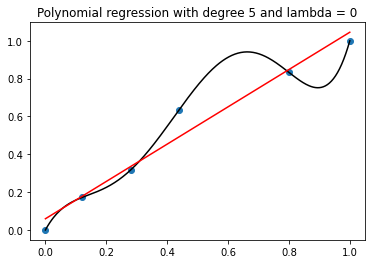

RSS: 1.0
Coefficients: [[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]


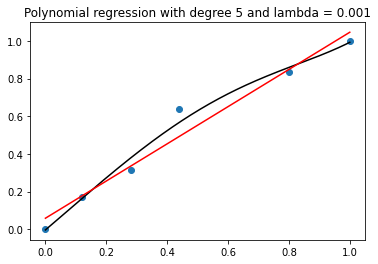

RSS: 0.9877944050899672
Coefficients: [[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]


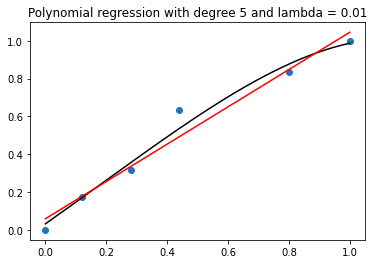

RSS: 0.9809539612050426
Coefficients: [[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]]


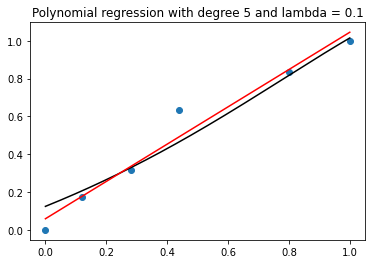

RSS: 0.9396437428481395
Coefficients: [[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]]


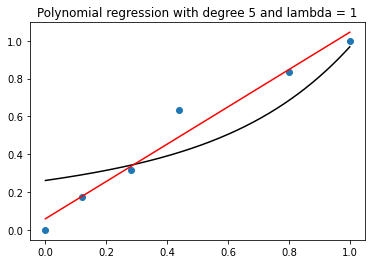

RSS: 0.7953946450161844
Coefficients: [[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]]


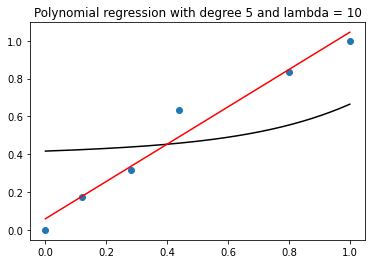

RSS: 0.3849505189364377
Coefficients: [[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]]


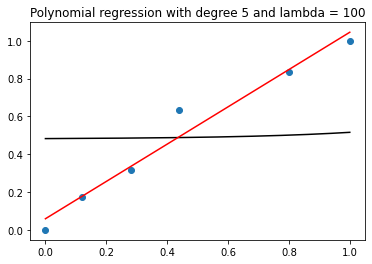

RSS: 0.05859088028960113
Coefficients: [[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]]


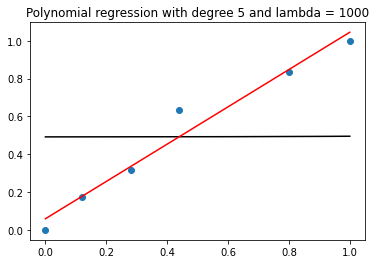

RSS: 0.006166338591997
Coefficients: [[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]]


In [47]:
## using for loop
for a in lambdas:
    ## instantiating object with specific lambda
    ridgereg = Ridge(alpha = a)
    ## fitting the model on polynomial features
    ridgereg.fit(X_poly,y)
    ## making predictions
    y_pred_ridge = ridgereg.predict(X_poly)
    ## Visualising
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black") # Polynomial Regression
    plt.plot(X_seq,lr.predict(X_seq),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(5) + " and lambda = " + str(a))
    plt.show()
    ## computing r2_score
    RSS = r2_score(y,y_pred_ridge)
    print('RSS:',RSS)
    ## getting coefficients 
    coef = ridgereg.coef_
    print('Coefficients:',coef)

In [73]:
print(X.shape)
print(y.shape)
print(X_seq.shape)

(6, 1)
(6, 1)
(300, 1)


In [72]:
a = ridgereg.predict(ridgecoef.fit_transform(X_seq))
a.shape

(300, 1)

In [74]:
y_pred_seq.shape

(300, 1)

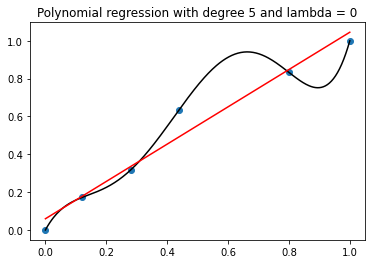

RSS: 1.0
Coefficients: [[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]


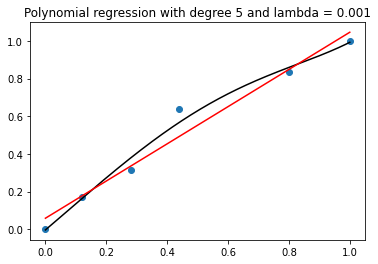

RSS: 0.9877944050899672
Coefficients: [[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]


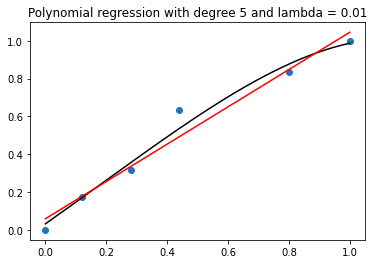

RSS: 0.9809539612050426
Coefficients: [[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]]


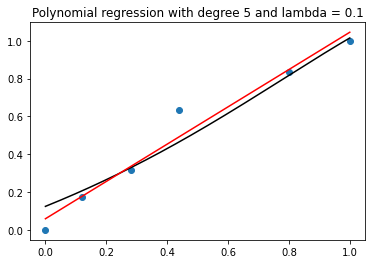

RSS: 0.9396437428481395
Coefficients: [[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]]


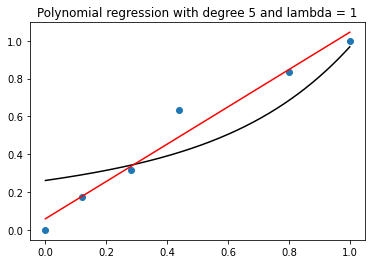

RSS: 0.7953946450161844
Coefficients: [[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]]


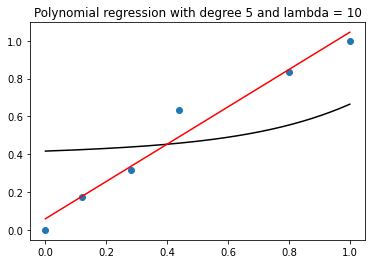

RSS: 0.3849505189364377
Coefficients: [[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]]


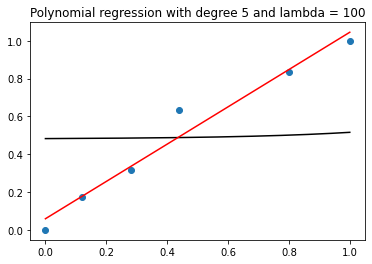

RSS: 0.05859088028960113
Coefficients: [[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]]


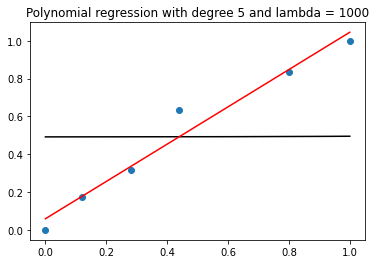

RSS: 0.006166338591997
Coefficients: [[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]]


In [48]:
## using for loop
for a in lambdas:
    ## instantiating object with specific lambda
    ridgereg = Ridge(alpha = a)
    ## fitting the model on polynomial features
    ridgereg.fit(X_poly,y)
    ## making predictions
    y_pred_ridge = ridgereg.predict(X_poly)
    ## Visualising: We have to define y_pred_ridge_seq within the for loop->why?
    ## Because we are using ridge regression and it uses lambda, and sinse we are taking
    ## different values of lambda from the lambdas list we have to define y_pred_ridge_seq
    ## within the for loop
    ## Making new X_poly_seq
    X_poly_seq = ridgecoef.fit_transform(X_seq)
    ## Makiing new y_pred_ridge_seq
    y_pred_ridge_seq = ridgereg.predict(X_poly_seq)
    ## using these new predictions for visualising
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,y_pred_ridge_seq,color="black") # Polynomial Regression
    plt.plot(X_seq,y_pred_seq ,color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(5) + " and lambda = " + str(a))
    plt.show()
    ## computing r2_score
    RSS = r2_score(y,y_pred_ridge)
    print('RSS:',RSS)
    ## getting coefficients 
    coef = ridgereg.coef_
    print('Coefficients:',coef)

# Lasso Regression

- Applying Ridge Regression with varying the hyperparameter 'lambda'

### Steps:
  - 1. Use linspace to create a number of evenly spaced variables(300 in this case) between X.min and X.max. We are using this because we have very few number of datapoints. We call this X_seq. Reshape X_seq to 2-D array.
  - 2. Create a list of values to be used for tuning the hyperparameter `'lambda'`.
  - 3. Create polynomial features of 'n' degree by transforming X
  - 4. Within a `for loop` for the values of i in the above list:
       - (A). Using these transformed X, create a lasso regression model
       - (B). Visualise for different lambdas using both linear reg and ridge reg
             - Redefine y_pred_poly_seq of lasso for X_seq
             - Redefine y_pred of lr, though this can be done outside the loop as well
       - (C). Get r2_score for different lambdas
       - (D). Get model coefficients 
- Q: We have to define y_pred_lasso_seq within the for loop->why?       
   - Because we are using ridge regression and it uses lambda, and sinse we are taking different values of lambda from the lambdas list we have to define y_pred_ridge_seq within the for loop

In [49]:
## importing libraries
from sklearn.linear_model import Lasso

In [50]:
## Creating X_seq
X_seq = np.linspace(X.min(),X.max(),300)

In [51]:
## reshaping X_seq
X_seq = X_seq.reshape(-1,1)

In [52]:
## Creating a list of values to be used for tuning the hyperparameter 'lambda'
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

#### Creating Polynomial features of degree 5

In [53]:
## importing libraries
from sklearn.preprocessing import PolynomialFeatures

In [54]:
## instantiation object
lassocoef = PolynomialFeatures(5)
## Transforming input features to polynomial features; X⁰, X¹, X², X³, X⁴, X⁵
X_poly5 = lassocoef.fit_transform(X)

### Making the Lasso model for different lambdas

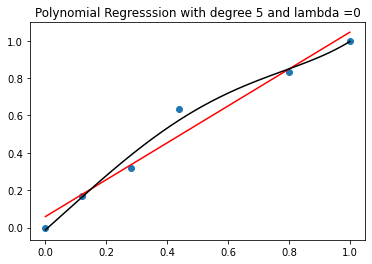

RSS: 0.9882107530558196
Model Coefficients: [ 0.          1.46152502  0.16901155 -1.08666253 -0.14086504  0.60488725]


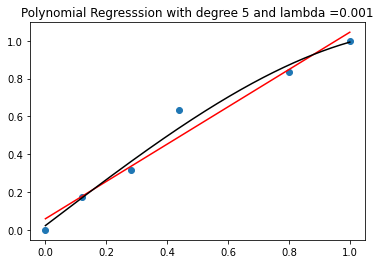

RSS: 0.9826605659196856
Model Coefficients: [ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]


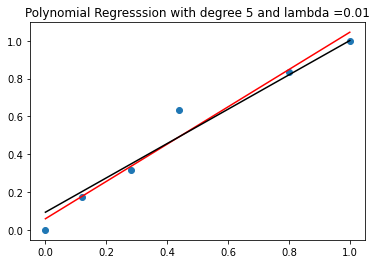

RSS: 0.9591121182494984
Model Coefficients: [0.       0.907835 0.       0.       0.       0.      ]


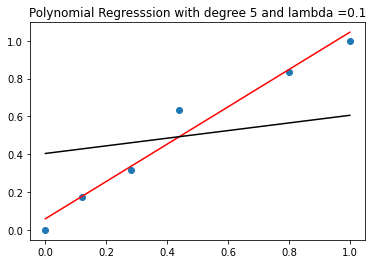

RSS: 0.3545216110743441
Model Coefficients: [0.         0.20176806 0.         0.         0.         0.        ]


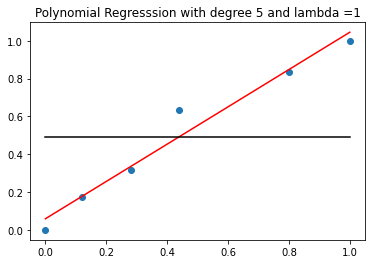

RSS: 0.0
Model Coefficients: [0. 0. 0. 0. 0. 0.]


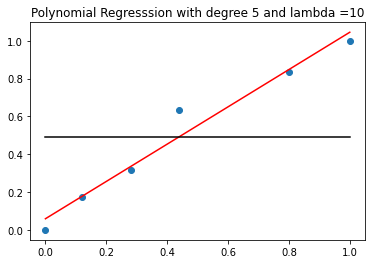

RSS: 0.0
Model Coefficients: [0. 0. 0. 0. 0. 0.]


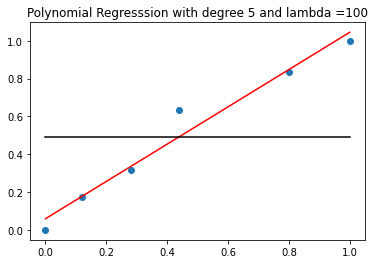

RSS: 0.0
Model Coefficients: [0. 0. 0. 0. 0. 0.]


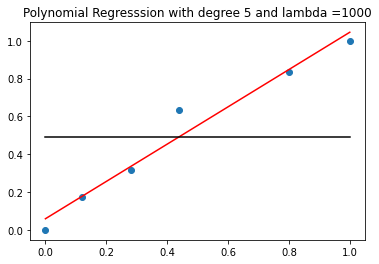

RSS: 0.0
Model Coefficients: [0. 0. 0. 0. 0. 0.]


In [55]:
for i in lambdas:
    ## instantiating Lasso object for different values of i
    lassoreg = Lasso(alpha=i)
    ## fitting into the object
    lassoreg.fit(X_poly5,y)
    ## making predictions
    y_pred_lasso = lassoreg.predict(X_poly5)
    ## model completed
    # For visualisation we take the following steps:
    ## 1. Create new X_poly5_seq by tranforming it to polynomial features 5
    ## Basically X_seq is noting but 300 points in X, as we transform X so do we x_seq
    ## 2. Create new y_pred_lasso_seq corresponding to X_poly5_seq
    ## 3. Similarly create y_pred_seq of lr model corresponding to X_seq
    ## 4. Plotting
    
    ## 1.Creating new X_poly5_seq by tranforming it to polynomial features 5
    X_poly5_seq = lassocoef.fit_transform(X_seq)
    ## 2. Creating new y_pred_lasso_seq corresponding to X_poly5_seq
    y_pred_lasso_seq = lassoreg.predict( X_poly5_seq)
    ## 3. Creating y_pred_seq of lr model corresponding to X_poly5_seq
    y_pred_seq = lr.predict(X_seq)
    
    ## 4. Plotting
    plt.scatter(X,y)
    plt.plot(X_seq,y_pred_seq,color='red')
    plt.plot(X_seq,y_pred_lasso_seq,color='black')
    plt.title('Polynomial Regresssion with degree 5 and '+'lambda ='+str(i))
    plt.show()
    
    ## R-squared
    from sklearn.metrics import r2_score
    RSS = r2_score(y,y_pred_lasso)
    print('RSS:',RSS)
    
    ## model coefficients 
    coefficients_lasso = lassoreg.coef_
    print('Model Coefficients:',coefficients_lasso)
    

## Note: Why are we not reshaping X and y in all the models?
### Beacause they have already been reshaped in this notebook. However always make sure that X,y,X_seq etc are in proper shape before being fed into models

# Ridge and Lasso Regression for specific lambda value

### Get the model coefficients for specific lambda say 0.001

### Ridge regression 

In [56]:
## getting polynomial features of degree 5
ridgecoef = PolynomialFeatures(5,include_bias=True)
## Transforming input features to polynomial features; X⁰, X¹, X², X³, X⁴, X⁵
X_poly5 = ridgecoef.fit_transform(X)

In [57]:
# Creating ridge regression model with lambda = .001
## importing libraries
from sklearn.linear_model import Ridge
## instantiating object
ridgereg = Ridge(alpha=.001)
## fitting into object
ridgereg.fit(X_poly,y)
## making predictions
y_pred_ridge = ridgereg.predict(X_poly)
## getting model coefficients 
ridgecoefficients = ridgereg.coef_
print('The Coefficients for Ridge Regression are: ',ridgecoefficients)
## getting r2_score
from sklearn.metrics import r2_score
RSS_ridge = r2_score(y,y_pred_ridge)
print('The r2_score for Ridge Regression = ',RSS_ridge)

The Coefficients for Ridge Regression are:  [[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]
The r2_score for Ridge Regression =  0.9877944050899672


### Lasso Regression

In [58]:
## Getting polynomial features with degree 5
lassocoef = PolynomialFeatures(5,include_bias=True)
##  Transforming input features to polynomial features; X⁰, X¹, X², X³, X⁴, X⁵
X_poly5 = lassocoef.fit_transform(X)

In [59]:
# Creating Lasso Regression model with lambda = .001
## importing libraries
from sklearn.linear_model import Lasso
## instantiating object
lassoreg = Lasso(alpha=.001)
## fitting into the model
lassoreg.fit(X_poly5,y)
## making predictions
y_pred_lasso = lassoreg.predict(X_poly5)
## Getting model coefficients 
lassocoefficients = lassoreg.coef_
print('The Coefficients for Lasso Regression are: ',ridgecoefficients)
## getting r2_score
from sklearn.metrics import r2_score
RSS_lasso = r2_score(y,y_pred_lasso)
print('The r2_score for Lasso Regression = ',RSS_lasso)

The Coefficients for Lasso Regression are:  [[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]
The r2_score for Lasso Regression =  0.9826605659196856


In [60]:
(linreg5.coef_).shape

(1, 6)

In [61]:
(lassoreg.coef_).shape

(6,)

### For better comparision let's make a dataframe

In [62]:
betas = pd.DataFrame(index=['X⁰', 'X¹', 'X²', 'X³', 'X⁴', 'X⁵'], columns=['Polynomial','Ridge','Lasso'])

In [63]:
## feeding values into the dataframe
betas['Polynomial'] = (linreg5.coef_).reshape(6)
betas['Ridge'] = (ridgereg.coef_).reshape(6)
betas['Lasso'] = (lassoreg.coef_).reshape(6)

In [64]:
betas

,Polynomial,Ridge,Lasso
X⁰,0.000000,0.000000,0.000000
X¹,2.942952,1.387022,1.224146
X²,-19.853518,0.122928,-0.000000
X³,71.185433,-0.686494,-0.253970
X⁴,-95.274266,-0.380945,-0.000000
X⁵,41.999398,0.552412,-0.000000
